In [15]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(2017) 
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils


In [16]:
#import of the Grad Cam
from keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
from keras.preprocessing import image
import keras.backend as K
import cv2

In [17]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

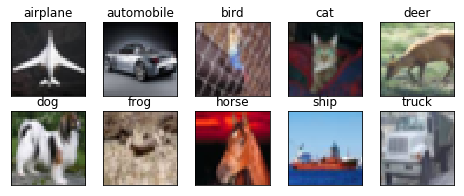

In [18]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [19]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [20]:

def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [21]:

train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

In [22]:
# Define the model
model = Sequential()
model.add(Convolution2D(48, 3, 3, border_mode='same', input_shape=(32, 32, 3)))
model.add(Activation('relu'))
model.add(Convolution2D(48, 3, 3))
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(96, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(96, 3, 3,name="gradCamlayer"))
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(192, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(192, 3, 3))
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Convolution2D(10, 2, 2,name="lastlayer", activation='softmax'))

model.add(Flatten())

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 32, 32, 48)        1344      
_________________________________________________________________
activation_7 (Activation)    (None, 32, 32, 48)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 30, 30, 48)        20784     
_________________________________________________________________
activation_8 (Activation)    (None, 30, 30, 48)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 30, 30, 48)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 15, 15, 48)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 15, 15, 96)        41568     
__________

C:\Balaji\Anaconda\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Balaji\Anaconda\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3))`
  """
C:\Balaji\Anaconda\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3), padding="same")`
  # Remove the CWD from sys.path while we load stuff.
C:\Balaji\Anaconda\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3), name="gradCamlayer")`
  if sys.path[0] == '':
C:\Balaji\Anaconda\lib\site-packages\ipykernel_launcher.py:17: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(192, (3, 3), padding="same")`
C:\Balaji\Anaconda\lib\s

In [23]:

def get_random_eraser(p=0.5, s_l=0.02, s_h=0.4, r_1=0.3, r_2=1/0.3, v_l=0, v_h=255, pixel_level=False):
    def eraser(input_img):
        img_h, img_w, img_c = input_img.shape
        p_1 = np.random.rand()

        if p_1 > p:
            return input_img

        while True:
            s = np.random.uniform(s_l, s_h) * img_h * img_w
            r = np.random.uniform(r_1, r_2)
            w = int(np.sqrt(s / r))
            h = int(np.sqrt(s * r))
            left = np.random.randint(0, img_w)
            top = np.random.randint(0, img_h)

            if left + w <= img_w and top + h <= img_h:
                break

        if pixel_level:
            c = np.random.uniform(v_l, v_h, (h, w, img_c))
        else:
            c = np.random.uniform(v_l, v_h)

        input_img[top:top + h, left:left + w, :] = c

        return input_img

    return eraser

In [24]:
def show_heatmap(index):
    sample = np.copy(train_x_features[index,::])
    x = np.copy(sample)
    
    
    x = np.expand_dims(x, axis=0)
    x= preprocess_input(x)
    preds = model.predict(x)
    class_idx = np.argmax (preds[0])
    class_output = model.output[:,class_idx]
    last_conv_layer = model.get_layer("gradCamlayer")
    grads = K.gradients(class_output,last_conv_layer.output )[0]
    pooled_grads = K.mean(grads,axis=(0,1,2))
    iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
    pooled_grads_value, conv_layer_output_value = iterate([x])
    for i in range(96):
        conv_layer_output_value[:, :, i] *= pooled_grads_value[i]
    heatmap = np.mean(conv_layer_output_value, axis = -1)
    heatmap = np.maximum(heatmap, 0)
    heatmap /= np.max(heatmap)
    heatmap = cv2.resize(heatmap, (sample.shape[1], sample.shape[0]))
    heatmap = np.uint8(255 * heatmap)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
    superimposed_img = cv2.addWeighted(sample, 0.5, heatmap, 0.5, 0)
    #from google.colab.patches import cv2_imshow
    #cv2_imshow( sample)
    #cv2_imshow(superimposed_img)
    #plt.imshow(sample)
    #plt.imshow(superimposed_img)
    #plt.show()
    return sample,superimposed_img


C:\Balaji\Anaconda\lib\site-packages\ipykernel_launcher.py:12: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  if sys.path[0] == '':
C:\Balaji\Anaconda\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=100)`
  if sys.path[0] == '':


Epoch 1/100
390/390 [==============================] - 9s 23ms/step - loss: 1.6364 - acc: 0.4003 - val_loss: 1.3693 - val_acc: 0.5588
Epoch 2/100
390/390 [==============================] - 8s 21ms/step - loss: 1.2122 - acc: 0.5670 - val_loss: 1.1385 - val_acc: 0.6474
Epoch 3/100
390/390 [==============================] - 8s 21ms/step - loss: 0.9900 - acc: 0.6485 - val_loss: 0.9202 - val_acc: 0.7122
Epoch 4/100
390/390 [==============================] - 8s 21ms/step - loss: 0.8701 - acc: 0.6902 - val_loss: 0.8429 - val_acc: 0.7313
Epoch 5/100
390/390 [==============================] - 8s 21ms/step - loss: 0.7743 - acc: 0.7264 - val_loss: 0.7856 - val_acc: 0.7537
Epoch 6/100
390/390 [==============================] - 8s 21ms/step - loss: 0.7184 - acc: 0.7477 - val_loss: 0.7774 - val_acc: 0.7450
Epoch 7/100
390/390 [==============================] - 8s 21ms/step - loss: 0.6596 - acc: 0.7685 - val_loss: 0.6836 - val_acc: 0.7779
Epoch 8/100
390/390 [==============================] - 8s 21ms

390/390 [==============================] - 8s 21ms/step - loss: 0.2230 - acc: 0.9235 - val_loss: 0.5977 - val_acc: 0.8208
Epoch 62/100
390/390 [==============================] - 8s 21ms/step - loss: 0.2233 - acc: 0.9228 - val_loss: 0.5905 - val_acc: 0.8245
Epoch 63/100
390/390 [==============================] - 8s 21ms/step - loss: 0.2324 - acc: 0.9202 - val_loss: 0.5920 - val_acc: 0.8198
Epoch 64/100
390/390 [==============================] - 8s 21ms/step - loss: 0.2339 - acc: 0.9199 - val_loss: 0.5684 - val_acc: 0.8268
Epoch 65/100
390/390 [==============================] - 8s 21ms/step - loss: 0.2254 - acc: 0.9228 - val_loss: 0.5765 - val_acc: 0.81454s - loss: 0.2142  - ETA: 3s - loss: 0.2186 - acc: 0 - ETA: 3s - loss:
Epoch 66/100
390/390 [==============================] - 8s 21ms/step - loss: 0.2258 - acc: 0.9215 - val_loss: 0.5763 - val_acc: 0.8202
Epoch 67/100
390/390 [==============================] - 8s 21ms/step - loss: 0.2281 - acc: 0.9219 - val_loss: 0.5679 - val_acc: 0.827

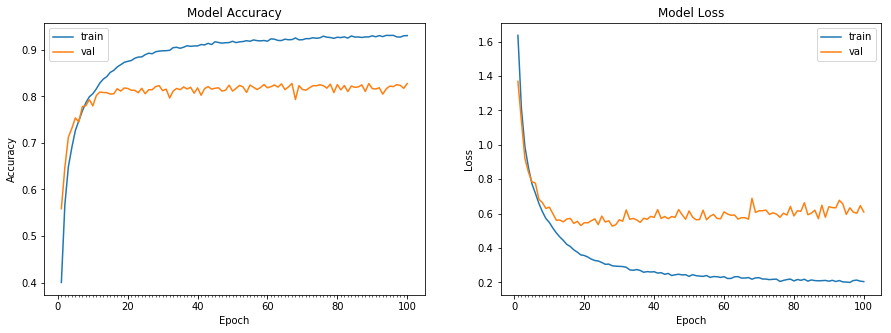

Accuracy on test data is: 82.75


C:\Balaji\Anaconda\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in true_divide
C:\Balaji\Anaconda\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in true_divide


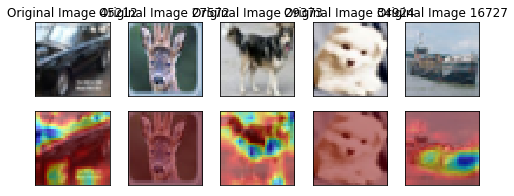

In [25]:
#Part 1 of the Assignment

from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(zoom_range=0.0, horizontal_flip=False,preprocessing_function=get_random_eraser(v_l=0, v_h=1
                                                                                                            
                                                                                                            , pixel_level=False))
# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 100, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))
(train_x_features, train_x_labels), (test_x_features, test_x_labels) = cifar10.load_data()
# In[11]:
# In[12]:
#show_heatmap(12)
fig1 = plt.figure(figsize=(8,3))    
random_num  = np.random.randint(0,50000,5)
counter = 0
for randInt in random_num:    
    (orig,heatmap) = show_heatmap(randInt)
    ax = fig1.add_subplot(2, 5, 1 + counter, xticks=[], yticks=[])    
    ax.set_title("Original Image " + str(randInt))
    plt.imshow(orig)      
    ax = fig1.add_subplot(2, 5, 1 + counter + 5, xticks=[], yticks=[])
    counter = counter+ 1
    plt.imshow(heatmap)    
    #plt.imshow(heatmap)      
plt.show()



C:\Balaji\Anaconda\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in true_divide
C:\Balaji\Anaconda\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in true_divide
C:\Balaji\Anaconda\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in true_divide


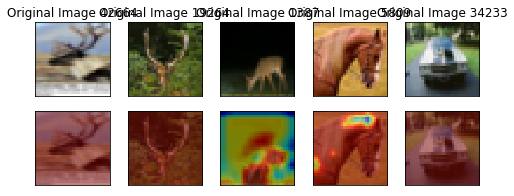

In [14]:
#Part 2 of the Assignment

fig1 = plt.figure(figsize=(8,3))    
random_num  = np.random.randint(0,50000,5)
counter = 0
for randInt in random_num:    
    (orig,heatmap) = show_heatmap(randInt)
    ax = fig1.add_subplot(2, 5, 1 + counter, xticks=[], yticks=[])    
    ax.set_title("Original Image " + str(randInt))
    plt.imshow(orig)      
    ax = fig1.add_subplot(2, 5, 1 + counter + 5, xticks=[], yticks=[])
    counter = counter+ 1
    plt.imshow(heatmap)    
    #plt.imshow(heatmap)      
plt.show()

